# Step 1 :Feature Extraction Using Bag_of_visual_word

In [23]:
import os
import numpy as np
import cv2
from sklearn.cluster import KMeans

# Function to extract 24-dimensional color histogram features from patches
def extract_patch_histogram(patch, bins=(8, 8, 8)):
    hist_r = cv2.calcHist([patch], [0], None, [bins[0]], [0, 256]).flatten()  # Red channel
    hist_g = cv2.calcHist([patch], [1], None, [bins[1]], [0, 256]).flatten()  # Green channel
    hist_b = cv2.calcHist([patch], [2], None, [bins[2]], [0, 256]).flatten()  # Blue channel
    
    hist_r /= np.sum(hist_r)
    hist_g /= np.sum(hist_g)
    hist_b /= np.sum(hist_b)
    
    feature_vector = np.concatenate([hist_r, hist_g, hist_b])
    return feature_vector

# Extract features from 32x32 patches
def extract_image_features(image, patch_size=(32, 32), bins=(8, 8, 8)):
    img_h, img_w, _ = image.shape
    all_patches_features = []
    
    for i in range(0, img_h, patch_size[0]):
        for j in range(0, img_w, patch_size[1]):
            patch = image[i:i+patch_size[0], j:j+patch_size[1]]
            if patch.shape[0] == patch_size[0] and patch.shape[1] == patch_size[1]:
                patch_features = extract_patch_histogram(patch, bins)
                all_patches_features.append(patch_features)
    
    return np.array(all_patches_features)

# Extract BoVW feature for a single image
def extract_bovw_feature(image_path, kmeans_model, num_clusters=32):
    image = cv2.imread(image_path)
    if image is not None:
        features = extract_image_features(image)
        cluster_assignments = kmeans_model.predict(features)
        
        # Count how many features fall into each of the 32 clusters
        bovw_feature = np.histogram(cluster_assignments, bins=np.arange(0, num_clusters + 1))[0]
        
        # Normalize the BoVW vector
        bovw_feature = bovw_feature / np.sum(bovw_feature)
        return bovw_feature

# Process and save BoVW features for the entire dataset
def process_bovw_features_for_dataset(dataset_folder, kmeans_model, output_folder, num_clusters=32):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    class_folders = os.listdir(dataset_folder)
    for class_name in class_folders:
        class_folder_path = os.path.join(dataset_folder, class_name)
        output_class_folder = os.path.join(output_folder, class_name)
        if not os.path.exists(output_class_folder):
            os.makedirs(output_class_folder)
        
        for image_name in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_name)
            bovw_feature = extract_bovw_feature(image_path, kmeans_model, num_clusters)
            output_file = os.path.join(output_class_folder, f"{image_name.split('.')[0]}_bovw.npy")
            np.save(output_file, bovw_feature)
            print(f"Processed and saved BoVW features for {image_name}")

# Example usage for processing the train and test datasets
train_folder = r'/home/user/Desktop/SPR_assignment02.o/SPR_assignment02/SPR_Assign02/group03/3class_scene_image_dataset/train'
test_folder = r'/home/user/Desktop/SPR_assignment02.o/SPR_assignment02/SPR_Assign02/group03/3class_scene_image_dataset/test'
output_train_bovw = r'/home/user/Desktop/SPR_assignment02.o/SPR_assignment02/SPR_Assign02/group03/3class_scene_image_dataset/output_train_features_bovw'
output_test_bovw = r'/home/user/Desktop/SPR_assignment02.o/SPR_assignment02/SPR_Assign02/group03/3class_scene_image_dataset/output_test_features_bovw'

# Assuming 24-dimensional histogram features have already been extracted for all training images
# Load all the training 24-dimensional features to apply K-means clustering
all_train_features = []
for class_name in os.listdir(train_folder):
    class_folder = os.path.join(train_folder, class_name)
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        image = cv2.imread(image_path)  # Load the image using OpenCV
    if image is not None:
        features = extract_image_features(image)  # Extract the 24-dimensional color histogram features from the image
        all_train_features.append(features)
        all_train_features.append(features)

all_train_features = np.vstack(all_train_features)  # Combine all training features

# Perform K-means clustering on the 24-dimensional features of all classes
num_clusters = 32
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(all_train_features)

# Process and save BoVW features for training and test sets
print("Processing BoVW features for training set...")
process_bovw_features_for_dataset(train_folder, kmeans_model, output_train_bovw, num_clusters)

print("Processing BoVW features for test set...")
process_bovw_features_for_dataset(test_folder, kmeans_model, output_test_bovw, num_clusters)

Processing BoVW features for training set...
Processed and saved BoVW features for sun_bejituvblxjrssxl.jpg
Processed and saved BoVW features for sun_ajcnfezfvmclnyac.jpg
Processed and saved BoVW features for sun_aafvyefdfobptgrz.jpg
Processed and saved BoVW features for sun_beroqgzewiqbdocz.jpg
Processed and saved BoVW features for sun_asvnyjcbsipjnsre.jpg
Processed and saved BoVW features for sun_axvdfabagcfcrjdn.jpg
Processed and saved BoVW features for sun_apinwducjegkiqxk.jpg
Processed and saved BoVW features for sun_agejojvttluyffmk.jpg
Processed and saved BoVW features for sun_auyjcmqmsxiatjtg.jpg
Processed and saved BoVW features for sun_ajswveykgvwddpqd.jpg
Processed and saved BoVW features for sun_afxxlyvgmhxzkxjs.jpg
Processed and saved BoVW features for sun_aykzcanmbpokcood.jpg
Processed and saved BoVW features for sun_aabpsmafrtneeadl.jpg
Processed and saved BoVW features for sun_afcagahirnkxvaja.jpg
Processed and saved BoVW features for sun_ayqetykpphjpuabg.jpg
Processed 

# Step 2a :visualizing BoVW Representation

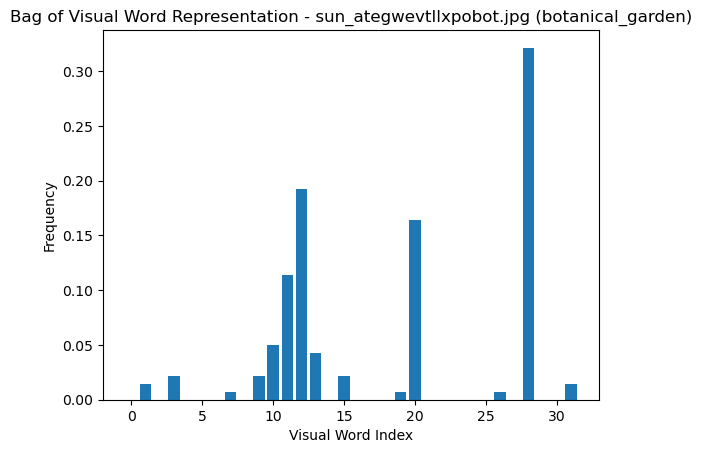

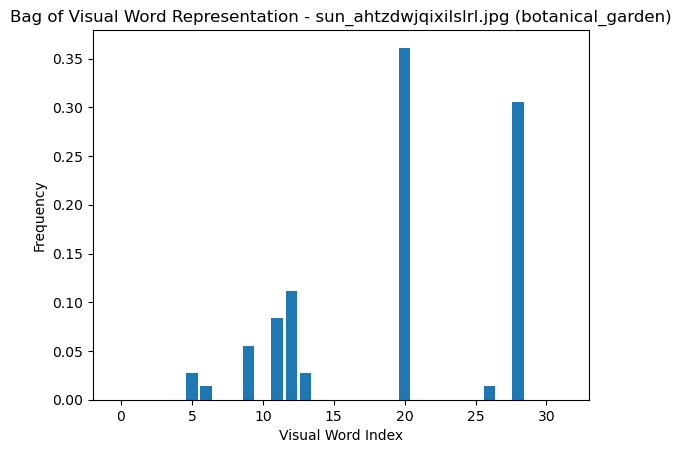

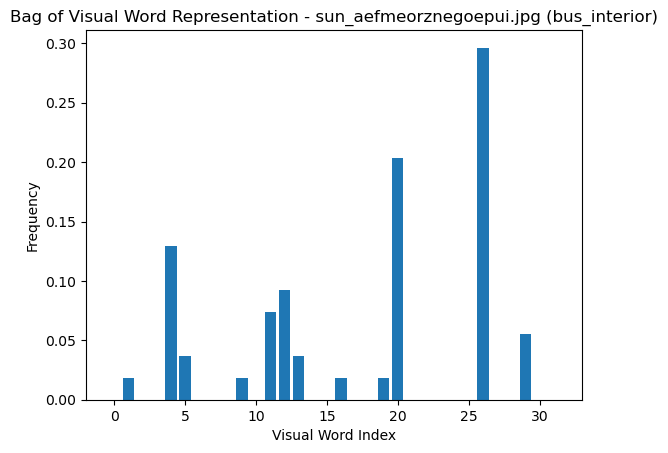

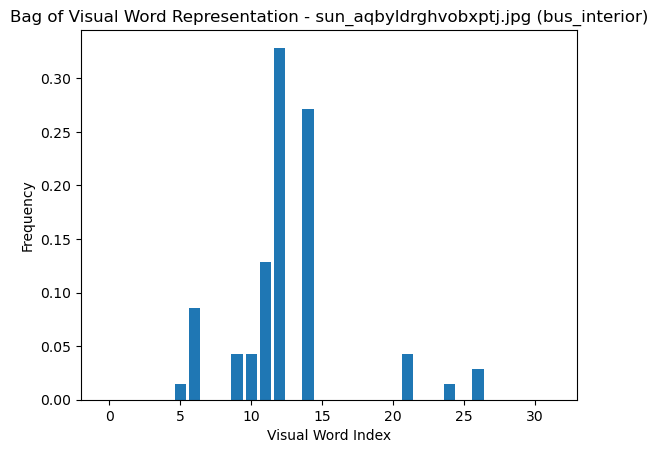

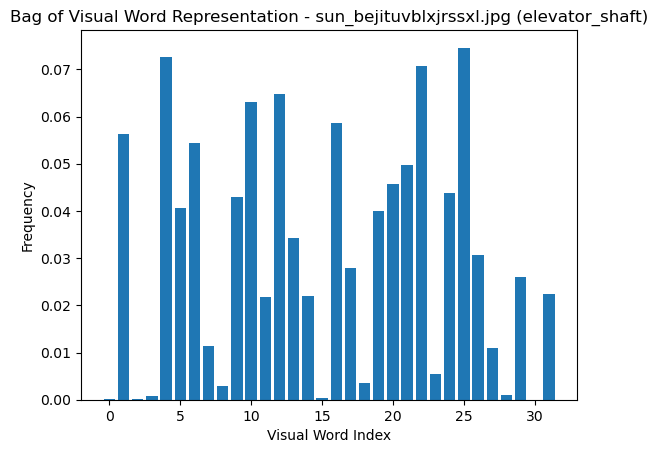

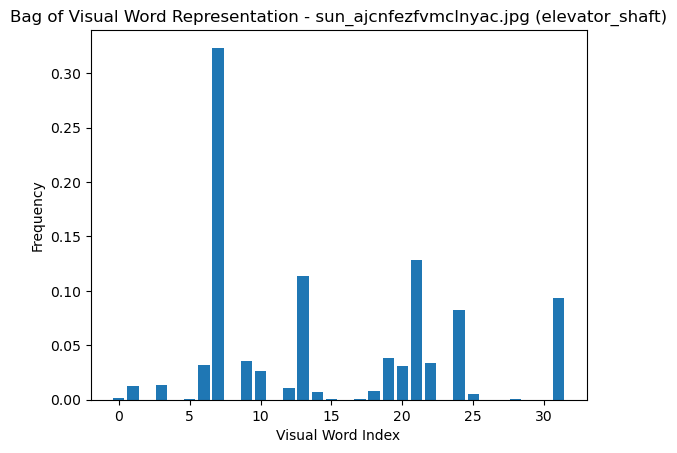

In [4]:
import os
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to visualize BoVW histogram
def plot_bovw_histogram(bovw_feature, image_name, class_name):
    plt.bar(range(len(bovw_feature)), bovw_feature)
    plt.title(f'Bag of Visual Word Representation - {image_name} ({class_name})')
    plt.xlabel('Visual Word Index')
    plt.ylabel('Frequency')
    plt.show()

# Function to extract 24-dimensional color histogram features from patches (already defined)
def extract_patch_histogram(patch, bins=(8, 8, 8)):
    hist_r = cv2.calcHist([patch], [0], None, [bins[0]], [0, 256]).flatten()
    hist_g = cv2.calcHist([patch], [1], None, [bins[1]], [0, 256]).flatten()
    hist_b = cv2.calcHist([patch], [2], None, [bins[2]], [0, 256]).flatten()
    
    hist_r /= np.sum(hist_r)
    hist_g /= np.sum(hist_g)
    hist_b /= np.sum(hist_b)
    
    feature_vector = np.concatenate([hist_r, hist_g, hist_b])
    return feature_vector

# Function to extract features from 32x32 patches
def extract_image_features(image, patch_size=(32, 32), bins=(8, 8, 8)):
    img_h, img_w, _ = image.shape
    all_patches_features = []
    
    for i in range(0, img_h, patch_size[0]):
        for j in range(0, img_w, patch_size[1]):
            patch = image[i:i+patch_size[0], j:j+patch_size[1]]
            if patch.shape[0] == patch_size[0] and patch.shape[1] == patch_size[1]:
                patch_features = extract_patch_histogram(patch, bins)
                all_patches_features.append(patch_features)
    
    return np.array(all_patches_features)

# Function to extract BoVW features from an image
def extract_bovw_feature(image_path, kmeans_model, num_clusters=32):
    image = cv2.imread(image_path)
    if image is not None:
        features = extract_image_features(image)  # Extract 24-dimensional color histogram features from the image
        cluster_assignments = kmeans_model.predict(features)  # Assign to clusters
        
        # Count how many features fall into each of the 32 clusters
        bovw_feature = np.histogram(cluster_assignments, bins=np.arange(0, num_clusters + 1))[0]
        
        # Normalize the BoVW vector
        bovw_feature = bovw_feature / np.sum(bovw_feature)
        return bovw_feature

# Function to visualize BoVW features for two images from each class
def visualize_bovw_features(train_bovw_path, kmeans_model):
    class_folders = ['botanical_garden', 'bus_interior', 'elevator_shaft']
    
    for class_name in class_folders:
        class_folder = os.path.join(train_bovw_path, class_name)
        image_files = os.listdir(class_folder)[:2]  # First two images
        
        for image_file in image_files:
            image_path = os.path.join(class_folder, image_file)
            bovw_feature = extract_bovw_feature(image_path, kmeans_model)
            plot_bovw_histogram(bovw_feature, image_file, class_name)

# Step 1: Load BoVW features from the entire training set
def load_all_train_features(train_bovw_path):
    all_train_features = []
    
    for class_name in os.listdir(train_bovw_path):
        class_folder = os.path.join(train_bovw_path, class_name)
        for image_name in os.listdir(class_folder):
            # Load each image and extract its BoVW feature
            image_path = os.path.join(class_folder, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                features = extract_image_features(image)  # Extract 24-dimensional color histogram features from the image
                all_train_features.extend(features)  # Add all patch features of the image
    
    return np.array(all_train_features)

# Example usage
train_bovw_path = r'/home/user/Desktop/SPR_assignment02.o/SPR_assignment02/SPR_Assign02/group03/3class_scene_image_dataset/train'
num_clusters = 32

# Step 2: Load all BoVW features from the training dataset
all_train_features = load_all_train_features(train_bovw_path)

# Step 3: Fit KMeans model with the BoVW features from the entire training dataset
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(all_train_features)

# Step 4: Call the function to visualize BoVW features for first two images of each class
visualize_bovw_features(train_bovw_path, kmeans_model)

# Step 2b :K-Means Clustering on BoVW Feature on every class

In [13]:
from sklearn.cluster import KMeans
import numpy as np
import os

# Perform K-means clustering on BoVW features for each class
def perform_kmeans_class_by_class(train_bovw_path, num_clusters):
    class_folders = ['botanical_garden', 'bus_interior', 'elevator_shaft']
    kmeans_params = {}

    for class_name in class_folders:
        print(f"\nPerforming K-means clustering for class: {class_name} with K={num_clusters}")

        # Load the BoVW features for this class
        class_folder = os.path.join(train_bovw_path, class_name)
        class_features = np.vstack([np.load(os.path.join(class_folder, f)) for f in os.listdir(class_folder)])

        # Perform K-means clustering on the BoVW features
        kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans_model.fit(class_features)

        # Get the centroids (means) and calculate covariances for each cluster
        centroids = kmeans_model.cluster_centers_
        covariances = []
        labels = kmeans_model.labels_

        for i in range(num_clusters):
            cluster_points = class_features[labels == i]
            if len(cluster_points) > 1:
                covariance = np.cov(cluster_points.T)
            else:
                covariance = np.eye(class_features.shape[1])  # Identity matrix if cluster has one point
            covariances.append(covariance + np.eye(class_features.shape[1]) * 1e-6)  # Regularize covariance

        # Store the parameters (centroids and covariances)
        kmeans_params[class_name] = (centroids, covariances)

        # Print the K-means parameters
        print(f"K-means parameters for class {class_name}:")
        print("Centroids (Means):")
        for i, centroid in enumerate(centroids):
            print(f"Cluster {i + 1} centroid:\n{centroid}")

        print("\nCovariance Matrices:")
        for i, covariance in enumerate(covariances):
            print(f"Cluster {i + 1} covariance matrix:\n{covariance}")

    return kmeans_params

# Example usage for clustering with dynamic number of clusters (k)
train_bovw_path = '/home/user/Desktop/SPR_assignment02.o/SPR_assignment02/SPR_Assign02/group03/3class_scene_image_dataset/output_train_features_bovw'
num_clusters = 1  # You can change this dynamically

# Perform K-means clustering on the BoVW features of each class
kmeans_params = perform_kmeans_class_by_class(train_bovw_path, num_clusters)


Performing K-means clustering for class: botanical_garden with K=1
K-means parameters for class botanical_garden:
Centroids (Means):
Cluster 1 centroid:
[0.00812229 0.00254317 0.01035477 0.15791428 0.01959324 0.00167357
 0.03114393 0.04542379 0.03870208 0.00051463 0.01918139 0.04678412
 0.01526328 0.02097319 0.20579489 0.00167829 0.05759769 0.01934732
 0.00655015 0.03728999 0.00764508 0.05220608 0.00645772 0.01628378
 0.02921065 0.01936198 0.00344628 0.02427643 0.02973649 0.02678489
 0.01943858 0.01870597]

Covariance Matrices:
Cluster 1 covariance matrix:
[[ 1.01381246e-03  3.86863283e-06  1.56904147e-05 ... -1.56940365e-04
   7.66369851e-05 -1.20214480e-04]
 [ 3.86863283e-06  6.55790405e-05  8.06367965e-06 ... -3.80373922e-06
  -3.24433687e-05 -3.82055213e-05]
 [ 1.56904147e-05  8.06367965e-06  5.20926304e-04 ...  1.59966289e-05
  -4.09355457e-05 -9.35735800e-05]
 ...
 [-1.56940365e-04 -3.80373922e-06  1.59966289e-05 ...  1.89590068e-03
   1.07942110e-04  1.26030613e-04]
 [ 7.663698

# Step 3 :Building the Bayes Classifier Using GMM

In [15]:
import numpy as np

# Function to compute the Gaussian probability density function (PDF)
def gaussian_pdf(x, mean, cov):
    n = len(x)
    epsilon = 1e-6  # Regularization to avoid singular matrices
    cov_det = np.linalg.det(cov + np.eye(n) * epsilon)  # Regularized determinant
    cov_inv = np.linalg.inv(cov + np.eye(n) * epsilon)  # Regularized inverse
    diff = x - mean
    exponent = -0.5 * np.dot(diff.T, np.dot(cov_inv, diff))
    return np.exp(exponent) / np.sqrt((2 * np.pi)**n * cov_det)

# Expectation step in EM algorithm (E-Step)
def expectation_step(X, means, covariances, weights):
    n, k = X.shape[0], len(means)
    responsibilities = np.zeros((n, k))
    for i in range(k):
        for j in range(n):
            responsibilities[j, i] = weights[i] * gaussian_pdf(X[j], means[i], covariances[i])
    
    responsibilities_sum = responsibilities.sum(axis=1, keepdims=True)
    responsibilities_sum[responsibilities_sum == 0] = 1e-6  # Avoid division by zero
    responsibilities /= responsibilities_sum
    return responsibilities

# Maximization step in EM algorithm (M-Step)
def maximization_step(X, responsibilities):
    n, d = X.shape
    k = responsibilities.shape[1]
    
    epsilon = 1e-6  # Regularization term to avoid division by zero
    weights = responsibilities.sum(axis=0) / (n + epsilon)
    means = np.dot(responsibilities.T, X) / (responsibilities.sum(axis=0)[:, None] + epsilon)
    
    covariances = []
    for i in range(k):
        diff = X - means[i]
        covariances.append(np.dot((responsibilities[:, i] * diff.T), diff) / (responsibilities[:, i].sum() + epsilon))
        covariances[i] += np.eye(d) * epsilon  # Regularize covariance
    
    return means, covariances, weights

# EM Algorithm to train the GMM
def gmm_em(X, k, means_init, covariances_init, max_iters=100, tol=1e-6):
    means = means_init
    covariances = covariances_init
    weights = np.ones(k) / k  # Initialize weights uniformly
    
    log_likelihoods = []
    
    for iteration in range(max_iters):
        # Expectation Step
        responsibilities = expectation_step(X, means, covariances, weights)
        
        # Maximization Step
        means, covariances, weights = maximization_step(X, responsibilities)
        
        # Log-Likelihood Calculation
        log_likelihood = np.sum([
            np.log(np.maximum(np.sum([weights[i] * gaussian_pdf(X[j], means[i], covariances[i]) for i in range(k)]), 1e-6))
            for j in range(len(X))
        ])
        log_likelihoods.append(log_likelihood)
        
        # Check for convergence
        if len(log_likelihoods) > 1 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break
    
    return means, covariances, weights, log_likelihoods

# Train GMM on BoVW features for each class using K-means initialization
def train_gmm_class_by_class(train_bovw_path, kmeans_params):
    class_folders = ['botanical_garden', 'bus_interior', 'elevator_shaft']
    gmm_models = {}
    log_likelihoods_per_class = {}

    for class_name in class_folders:
        print(f"\nTraining GMM for class: {class_name}")
        
        # Load the BoVW features for this class
        class_folder = os.path.join(train_bovw_path, class_name)
        class_features = np.vstack([np.load(os.path.join(class_folder, f)) for f in os.listdir(class_folder)])
        
        # Get K-means initialization parameters for this class
        centroids, covariances = kmeans_params[class_name]
        k = len(centroids)  # Number of clusters from K-means
        
        # Train GMM using the EM algorithm with K-means initialization
        means, covariances, weights, log_likelihoods = gmm_em(class_features, k, centroids, covariances)
        
        # Store GMM parameters for this class
        gmm_models[class_name] = (means, covariances, weights)
        log_likelihoods_per_class[class_name] = log_likelihoods
        
        # Print final GMM parameters for the class
        print(f"\nFinal GMM Parameters for class {class_name}:")
        print("Means (Centroids):", means)
        print("Covariances:", covariances)
        print("Mixing Coefficients (Weights):", weights)

    return gmm_models, log_likelihoods_per_class

# Example usage
train_bovw_path = '/home/user/Desktop/SPR_assignment02.o/SPR_assignment02/SPR_Assign02/group03/3class_scene_image_dataset/output_train_features_bovw'
gmm_models, log_likelihoods_per_class = train_gmm_class_by_class(train_bovw_path, kmeans_params)

# Plot log-likelihoods for each class
def plot_log_likelihoods(log_likelihoods_per_class):
    for class_name, log_likelihoods in log_likelihoods_per_class.items():
        plt.plot(log_likelihoods, label=f'Class: {class_name}')
    
    plt.title('Log-Likelihood vs Iterations for each class')
    plt.xlabel('Iteration')
    plt.ylabel('Log-Likelihood')
    plt.legend()
    plt.show()

plot_log_likelihoods(log_likelihoods_per_class)


Training GMM for class: botanical_garden

Final GMM Parameters for class botanical_garden:
Means (Centroids): [[0.00812229 0.00254317 0.01035477 0.15791428 0.01959324 0.00167357
  0.03114393 0.04542379 0.03870208 0.00051463 0.01918139 0.04678411
  0.01526328 0.02097319 0.20579489 0.00167829 0.05759769 0.01934732
  0.00655015 0.03728999 0.00764508 0.05220608 0.00645772 0.01628378
  0.02921065 0.01936198 0.00344627 0.02427643 0.02973649 0.02678489
  0.01943858 0.01870597]]
Covariances: [array([[ 9.93556187e-04,  3.79126010e-06,  1.53766061e-05, ...,
        -1.53801554e-04,  7.51042439e-05, -1.17810188e-04],
       [ 3.79126010e-06,  6.42874584e-05,  7.90240590e-06, ...,
        -3.72766437e-06, -3.17945007e-05, -3.74414101e-05],
       [ 1.53766061e-05,  7.90240590e-06,  5.10527768e-04, ...,
         1.56766960e-05, -4.01168340e-05, -9.17021065e-05],
       ...,
       [-1.53801554e-04, -3.72766437e-06,  1.56766960e-05, ...,
         1.85800263e-03,  1.05783266e-04,  1.23509998e-04],
 

NameError: name 'plt' is not defined

# Step 4 :Testing and Evaluation 

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Classify new data points using trained GMM
def classify_gmm(x, gmm_models):
    likelihoods = {}
    for class_name, (means, covariances, weights) in gmm_models.items():
        likelihoods[class_name] = np.sum([weights[i] * gaussian_pdf(x, means[i], covariances[i]) for i in range(len(means))])
    return max(likelihoods, key=likelihoods.get)

def evaluate_gmm(test_features_path, gmm_models):
    label_dict = {'botanical_garden': 0, 'bus_interior': 1, 'elevator_shaft': 2}
    
    y_true = []
    y_pred = []
    
    for class_name in label_dict:
        class_label = label_dict[class_name]
        class_folder = os.path.join(test_features_path, class_name)
        test_features = np.vstack([np.load(os.path.join(class_folder, f)) for f in os.listdir(class_folder)])
        
        for feature in test_features:
            predicted_class = classify_gmm(feature, gmm_models)
            y_true.append(class_label)
            y_pred.append(label_dict[predicted_class])
    
    return np.array(y_true), np.array(y_pred)

def calculate_metrics(y_true, y_pred):
    label_names = ['botanical_garden', 'bus_interior', 'elevator_shaft']
    precision_per_class = precision_score(y_true, y_pred, average=None, zero_division=0)
    recall_per_class = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)
    
    mean_precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    mean_recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    mean_f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(conf_matrix)
    
    print("\nClass-wise Precision, Recall, F1-score:")
    for i, class_name in enumerate(label_names):
        print(f"{class_name}:")
        print(f"  Precision: {precision_per_class[i]:.4f}")
        print(f"  Recall: {recall_per_class[i]:.4f}")
        print(f"  F1-Score: {f1_per_class[i]:.4f}")
    
    print("\nMean Precision, Recall, F1-Score (weighted):")
    print(f"  Mean Precision: {mean_precision:.4f}")
    print(f"  Mean Recall: {mean_recall:.4f}")
    print(f"  Mean F1-Score: {mean_f1:.4f}")

# Example usage
test_features_path = r'/home/user/Desktop/SPR_assignment02.o/SPR_assignment02/SPR_Assign02/group03/3class_scene_image_dataset/output_test_features_bovw'
y_true, y_pred = evaluate_gmm(test_features_path, gmm_models)
calculate_metrics(y_true, y_pred)

Accuracy: 69.33%
Confusion Matrix:
[[40  7  3]
 [ 5 37  8]
 [ 5 18 27]]

Class-wise Precision, Recall, F1-score:
botanical_garden:
  Precision: 0.8000
  Recall: 0.8000
  F1-Score: 0.8000
bus_interior:
  Precision: 0.5968
  Recall: 0.7400
  F1-Score: 0.6607
elevator_shaft:
  Precision: 0.7105
  Recall: 0.5400
  F1-Score: 0.6136

Mean Precision, Recall, F1-Score (weighted):
  Mean Precision: 0.7024
  Mean Recall: 0.6933
  Mean F1-Score: 0.6915
